<a href="https://colab.research.google.com/github/hollyemblem/Recommenders/blob/main/Item_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collaborative Filtering and Item Similarity

In this notebook, I explore Amazon's algorithm for item-similarity, as described in Kim Falk's Practical Recommender Systems. We examine how to compute the similarity scores for a set of film ratings provided by users, as per Falk's example.

For reference, the Amazon algorithm is described as follows:

For each item in product catalog, I1 </br>
    &nbsp;&nbsp;&nbsp;&nbsp;For each customer C who purchased I1 </br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For each item I2 purchased by customer C </br>
            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Record that a customer purchased I1 and I2 </br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For each item I2</br>
            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Compute the similarity between I1 and I2 </br>

To conduct this task, we'll recreate the following matrix:
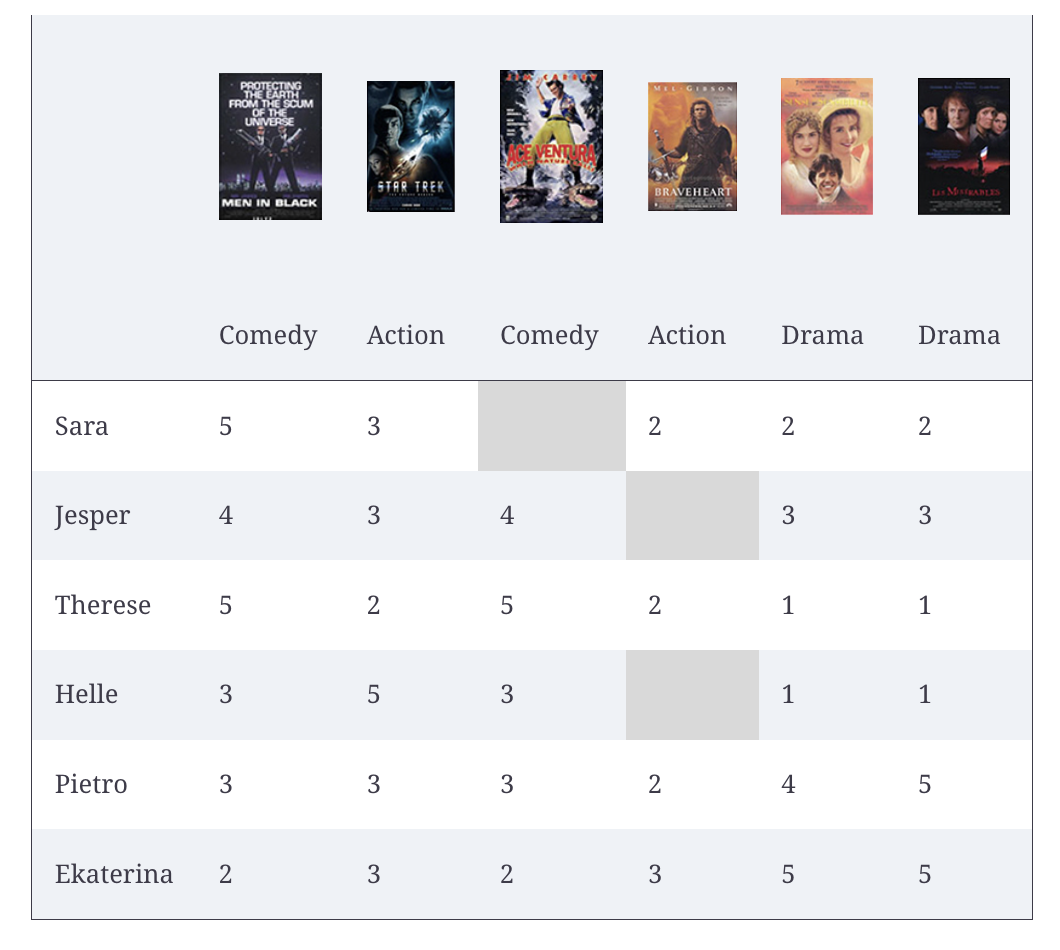

Specifically, we will look at what films have been rated together, reaching this format:

MIB: [ST, B, SS, LM, AV] </br>
ST: [MIB, B, SS, LM, AV] </br>
B: [MIB, ST, SS, LM, AV] </br>
SS: [MIB, ST, B, LM, AV] </br>
LM: [MIB, ST, SS, B, AV] </br>
AV: [MIB, ST, B, SS, LM] </br>

In [1]:
mib = set('ST','B','SS','LM','AV')
st = set('B','SS','LM','AV','MIB')
b = set('MIB','SS','ST','LM','AV')
ss = set('MIB','ST','B','LM','AV')
lm = set('MIB','ST','B','SS','AV')
av = set('MIB','ST','B','SS','LM')

TypeError: ignored

Next, we calculated the adjusted cosine similarity between the items, as an example, for similarity between Men in Black and Star Trek:
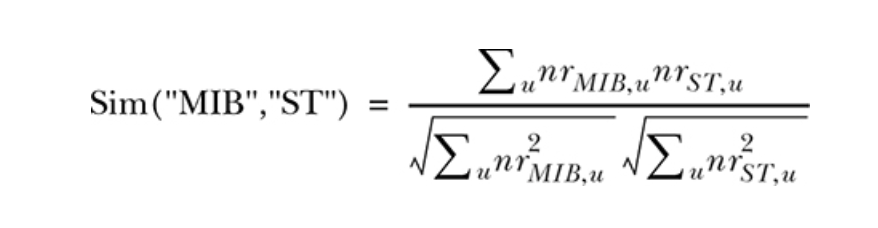

We'll calculate this in Python, with the following steps:

1. Normalise the ratings in the table.
2. Calculate the similarity between MIB and Star Trek
3. To do this, we look at each user in term and sum it. 

In [2]:
import pandas as pd
import numpy as np
columns = ['MIB', 'Star Trek', 'Ace Ventura', 'Braveheart', 'Pride and Prejudice', 'Les Miserables']

# Define the data for each column
data = [[5,3,np.nan,2,2,2],[4,3,4,np.nan,3,3],[5,2,5,2,1,1],[3,5,3,np.nan,1,1],[3,3,3,2,4,5],[2,3,2,3,5,5]]

index_labels=['Sara','Jesper','Therese','Helle','Pietro','Ekaterina']

In [3]:
df = pd.DataFrame(data, columns=columns, index=index_labels)

In [4]:
df

,MIB,Star Trek,Ace Ventura,Braveheart,Pride and Prejudice,Les Miserables
Sara,5,3,NaN,2.0,2,2
Jesper,4,3,4.0,NaN,3,3
Therese,5,2,5.0,2.0,1,1
Helle,3,5,3.0,NaN,1,1
Pietro,3,3,3.0,2.0,4,5
Ekaterina,2,3,2.0,3.0,5,5


In [5]:
ratings_array = df.to_numpy()

In [6]:
def normalize_ratings(df):
    # Calculate the overall average rating for each user
    user_avg_rating = df.mean(axis=1)

    # Subtract the user's average rating from each movie
    normalized_df = df.sub(user_avg_rating, axis=0)

    return normalized_df

In [7]:
n_df = normalize_ratings(df)

Now we'll work through calculating the similarity between MIB and Star Trek:

In code...

In [8]:
n_df.head(10)

,MIB,Star Trek,Ace Ventura,Braveheart,Pride and Prejudice,Les Miserables
Sara,2.200000,0.200000,NaN,-0.800000,-0.800000,-0.800000
Jesper,0.600000,-0.400000,0.600000,NaN,-0.400000,-0.400000
Therese,2.333333,-0.666667,2.333333,-0.666667,-1.666667,-1.666667
Helle,0.400000,2.400000,0.400000,NaN,-1.600000,-1.600000
Pietro,-0.333333,-0.333333,-0.333333,-1.333333,0.666667,1.666667
Ekaterina,-1.333333,-0.333333,-1.333333,-0.333333,1.666667,1.666667


In [9]:
##Converting the normalised array to Numpy
ratings_array = n_df.to_numpy()

In [10]:
ratings_array

array([[ 2.2       ,  0.2       ,         nan, -0.8       , -0.8       ,
        -0.8       ],
       [ 0.6       , -0.4       ,  0.6       ,         nan, -0.4       ,
        -0.4       ],
       [ 2.33333333, -0.66666667,  2.33333333, -0.66666667, -1.66666667,
        -1.66666667],
       [ 0.4       ,  2.4       ,  0.4       ,         nan, -1.6       ,
        -1.6       ],
       [-0.33333333, -0.33333333, -0.33333333, -1.33333333,  0.66666667,
         1.66666667],
       [-1.33333333, -0.33333333, -1.33333333, -0.33333333,  1.66666667,
         1.66666667]])

In [11]:
###Obtaining scores for MIB and Star Trek
mib = ratings_array[:, 0]
st = ratings_array[:, 1]

In [12]:
##Getting the dot product of MIB and Star Trek
np.dot(mib, st)/(np.sqrt(np.sum(mib**2)) * np.sqrt(np.sum(st**2)))

0.017445546450285194

Here is a nice reminder on the dot product:
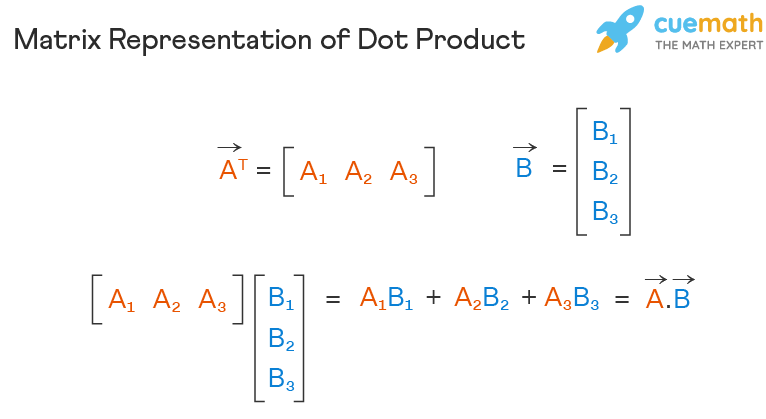

##What about similarities between Pride and Prejudice and Les Mis?

In [13]:
pp = ratings_array[:, 4]
lm = ratings_array[:, 5]

In [14]:
np.dot(pp, lm)/(np.sqrt(np.sum(pp**2)) * np.sqrt(np.sum(lm**2)))

0.9584059204114145

Below is some very scrappy code that computes the adjusted cosine similarity for each film.

In [60]:
# Compute the dot product for each film, handling NA values
for i, current in enumerate(columns):
    # Extract the current film column
    current_film = ratings_array[:, i]
    for j, compare in enumerate(columns):
      compared_film = ratings_array[:,j]
      # Create a boolean mask where True for non-nan values
      mask = ~np.isnan(compared_film)
      compared_film_filter = compared_film[mask]
      current_film_filter = current_film[mask]
    
      ##Mask for compared film
      mask2 = ~np.isnan(current_film_filter)
      compared_film_filter_2 = compared_film_filter[mask2]
      current_film_filter_2 = current_film_filter[mask2]      



      input = np.dot(compared_film_filter_2, current_film_filter_2)/(np.sqrt(np.sum(compared_film_filter_2**2)) * np.sqrt(np.sum(current_film_filter_2**2)))
      print("Comparison of "+ current + " to " + compare + " is " + str(input))

Comparison of MIB to MIB is 1.0
Comparison of MIB to Star Trek is 0.017445546450285194
Comparison of MIB to Ace Ventura is 0.9999999999999999
Comparison of MIB to Braveheart is -0.4033513990817606
Comparison of MIB to Pride and Prejudice is -0.8232429760295186
Comparison of MIB to Les Miserables is -0.763901128751254
Comparison of Star Trek to MIB is 0.017445546450285194
Comparison of Star Trek to Star Trek is 1.0
Comparison of Star Trek to Ace Ventura is -0.03893123428211387
Comparison of Star Trek to Braveheart is 0.5794956538171452
Comparison of Star Trek to Pride and Prejudice is -0.4452551978471871
Comparison of Star Trek to Les Miserables is -0.436228962947367
Comparison of Ace Ventura to MIB is 0.9999999999999999
Comparison of Ace Ventura to Star Trek is -0.03893123428211387
Comparison of Ace Ventura to Ace Ventura is 0.9999999999999999
Comparison of Ace Ventura to Braveheart is -0.1611645928050759
Comparison of Ace Ventura to Pride and Prejudice is -0.8716672789633021
Compariso